<a href="https://colab.research.google.com/github/MatheussLM/Curso-de-Extens-o/blob/main/Segundo_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segundo Exemplo de Manipulação de Dados usando Python Pandas

Veremos inserção de Dados, remoção de colunas, merge, gráficos

Data: 9 e 10 de Fevereiro

In [2]:
# Importando Biblioteca pandas no Python
import pandas as pd
combustiveis_df = pd.read_excel("ca-2021-02.xlsx")

In [3]:
# Inserção Simples de dados
combustiveis_df['Ativo'] = True
display(combustiveis_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168409 entries, 0 to 168408
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     168409 non-null  object        
 1   Estado - Sigla     168409 non-null  object        
 2   Municipio          168409 non-null  object        
 3   Revenda            168409 non-null  object        
 4   CNPJ da Revenda    168409 non-null  object        
 5   Nome da Rua        168409 non-null  object        
 6   Numero Rua         168353 non-null  object        
 7   Complemento        35057 non-null   object        
 8   Bairro             168043 non-null  object        
 9   Cep                168409 non-null  object        
 10  Produto            168409 non-null  object        
 11  Data da Coleta     168409 non-null  datetime64[ns]
 12  Valor de Venda     168409 non-null  float64       
 13  Valor de Compra    0 non-null       float64 

None

In [4]:
# Criar uma coluna "Obs" que tenha nela escrito 'Melhor Cidade' quando a coluna "Municipio" for igual a OSASCO
combustiveis_df['Obs'] = ["Melhor Cidade" if municipio == 'OSASCO' else None for municipio in combustiveis_df['Municipio']]
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['OSASCO', 'INDAIATUBA', 'SALTO']),['Municipio','Obs']])

,Municipio,Obs
6326,SALTO,None
6327,SALTO,None
6328,SALTO,None
6329,SALTO,None
6330,SALTO,None
...,...,...
162059,OSASCO,Melhor Cidade
162060,OSASCO,Melhor Cidade
162061,OSASCO,Melhor Cidade
162062,OSASCO,Melhor Cidade


In [5]:
# Como preencher uma coluna 'Valor de Venda - Status' que verifica o seguinte:
# Se o valor de venda for maior que 6,5 reais, ele fala que está caro... caso contrário, está barato
import numpy as np

combustiveis_df['Status do Valor de Vendas'] = np.where(combustiveis_df['Valor de Venda'] > 6.5, 'Caro', 'Barato')
display(combustiveis_df[['Revenda', 'Valor de Venda', 'Status do Valor de Vendas']])

,Revenda,Valor de Venda,Status do Valor de Vendas
0,POSTO ARAPIRACA LTDA,6.799,Caro
1,POSTO ARAPIRACA LTDA,5.299,Barato
2,POSTO ARAPIRACA LTDA,5.549,Barato
3,POSTO ARAPIRACA LTDA,6.899,Caro
4,POSTO ARAPIRACA LTDA,5.649,Barato
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Barato
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Caro
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Barato
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Barato


In [6]:
# Calcular postos de gasolina por habitantes temos na amostragem de combustiveis nov/2021
num_habitantes_df = pd.read_csv('ibge_num_habitantes_estimado.csv', sep=';')
num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace = True)
display(num_habitantes_df) 

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [7]:
# Faz um MERGE dos dois dataframes
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(num_habitantes_df, how = "inner", on = colunas)
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Status do Valor de Vendas,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,None,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,None,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,None,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,None,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,None,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,None,Barato,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,None,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,None,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,None,Barato,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Regiao - Sigla             20634 non-null  object        
 1   Estado - Sigla             20634 non-null  object        
 2   Municipio                  20634 non-null  object        
 3   Revenda                    20634 non-null  object        
 4   CNPJ da Revenda            20634 non-null  object        
 5   Nome da Rua                20634 non-null  object        
 6   Numero Rua                 20634 non-null  object        
 7   Complemento                3837 non-null   object        
 8   Bairro                     20634 non-null  object        
 9   Cep                        20634 non-null  object        
 10  Produto                    20634 non-null  object        
 11  Data da Coleta             20634 non-null  datetime64[ns]
 12  Valo

In [8]:
#Destruir coluna completamente vazia, todas as linhas são nulas
merge_df.dropna(axis='columns', inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Regiao - Sigla             20634 non-null  object        
 1   Estado - Sigla             20634 non-null  object        
 2   Municipio                  20634 non-null  object        
 3   Revenda                    20634 non-null  object        
 4   CNPJ da Revenda            20634 non-null  object        
 5   Nome da Rua                20634 non-null  object        
 6   Numero Rua                 20634 non-null  object        
 7   Bairro                     20634 non-null  object        
 8   Cep                        20634 non-null  object        
 9   Produto                    20634 non-null  object        
 10  Data da Coleta             20634 non-null  datetime64[ns]
 11  Valor de Venda             20634 non-null  float64       
 12  Unid

In [22]:
# Destruir Colunas // Caso não coloque todas as colunas na primeira vez que rodar este bloco, ao repetir o comando ele da erro naqueles nomes que não existem mais.
colunas = ['Bairro']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     20634 non-null  object
 1   Municipio          20634 non-null  object
 2   Revenda            20634 non-null  object
 3   CNPJ da Revenda    20634 non-null  object
 4   NumHabitantes2021  20634 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 967.2+ KB
None


In [24]:
# Remover linhas duplicadas
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
7,GO,GOIANIA,POSTO DN LTDA,05.413.136/0001-47,1555626
11,GO,GOIANIA,POSTO ALDEIA LTDA,04.896.662/0001-42,1555626
15,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0001-04,1555626
...,...,...,...,...,...
1677,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA II LTDA,06.955.648/0001-06,6775561
1682,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA LTDA,03.246.347/0001-07,6775561
1688,RJ,RIO DE JANEIRO,NOVA PARADINHA AUTO POSTO LTDA,07.594.094/0001-13,6775561
1694,RJ,RIO DE JANEIRO,AUTO POSTO LUAR DA PENHA LTDA.,07.035.006/0001-43,6775561


In [25]:
# Agrupar e contar quantos postos tem na cidade...
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio','NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda":"Número de Postos"}, inplace=True)
display(postos_por_municipio_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     15 non-null     object
 1   Municipio          15 non-null     object
 2   NumHabitantes2021  15 non-null     int64 
 3   Número de Postos   15 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 608.0+ bytes


None

In [26]:
postos_por_municipio_df['NUm Habitantes Por Postos'] = postos_por_municipio_df['NumHabitantes2021'] / postos_por_municipio_df['Número de Postos'] 
display(postos_por_municipio_df)

,Estado - Sigla,Municipio,NumHabitantes2021,Número de Postos,NUm Habitantes Por Postos
0,AC,RIO BRANCO,419452,44,9533.000000
1,GO,GOIANIA,1555626,93,16727.161290
2,MG,BELO HORIZONTE,2530701,54,46864.833333
3,MS,CAMPO GRANDE,916001,104,8807.701923
4,PR,CURITIBA,1963726,110,17852.054545
5,RJ,RIO DE JANEIRO,6775561,379,17877.469657
6,RN,NATAL,803739,37,21722.675676
7,RO,PORTO VELHO,548952,40,13723.800000
8,RS,PORTO ALEGRE,1492530,73,20445.616438
9,SP,CAMPINAS,1223237,51,23985.039216


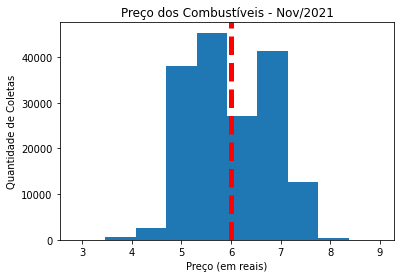

In [13]:
#Vamos brincar de gráficos !!!
import matplotlib.pyplot as plt

plt.hist(combustiveis_df['Valor de Venda'])
#Colocar titulo no gráfico
plt.title('Preço dos Combustíveis - Nov/2021')
# Rótulo Horizontal
plt.xlabel("Preço (em reais)")
#Rótulo Vertical
plt.ylabel("Quantidade de Coletas")
# Traça a linha vermelha tracejada com o preço médio
plt.axvline(combustiveis_df['Valor de Venda'].mean(), color='red', linestyle='dashed', linewidth=5)

# "Plota" o gráfico
plt.show()

In [14]:
# Visualização do consumo médio
c_mean = combustiveis_df['Valor de Venda'].groupby(by = combustiveis_df['Produto']).mean()
display(c_mean)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

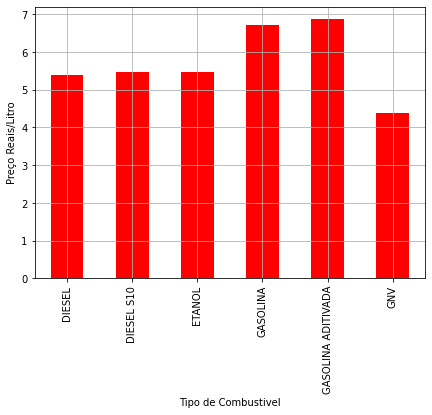

In [15]:
# Vou definir a área do gráfico
plt.figure(figsize=(7,5))
# Plotar o gráfico
c_mean.plot(
      kind='bar',
      xlabel='Tipo de Combustivel',
      ylabel='Preço Reais/Litro',  
      color = 'red'
)
#grid
plt.grid()
#Exibe
plt.show()

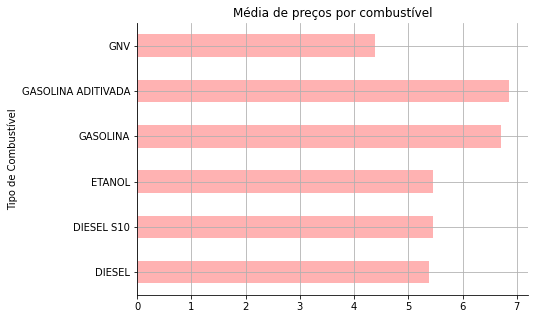

In [16]:
import seaborn as sns

#Vou definir a área do gráfico
plt.figure(figsize=(7,5))

#Plotar o gráfico
c_mean.plot(
    kind="barh",
    xlabel="Tipo de Combustível",
    ylabel="Preço reais/litro",
    title="Média de preços por combustível",
    color="red",
    alpha=0.3
)

#Grid
plt.grid()

#Remover as linhas superior e lateral direita do gráfico 
sns.despine()

#Exibe
plt.show()

In [17]:
#c_mean.reset_index(inplace=True)
display(c_mean)

excel = "por_litro.xlsx"
c_mean.to_excel(excel, "Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [20]:
#Vamor personalizar a planilha Excel...
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

#Vai abrir o Excel no openpyxl
wb = load_workbook(excel) # wb = Workbook

#Pegar a planilha certa... usando o Sheet Name (nome da planilha)
ws = wb['Sumário'] # Work Sheet -> planilha atual, ativa, de trabalho

#Vamos pintar o cabeçalho da tabela de "cinzinha"
cinzinha = PatternFill("solid", fgColor="CCCCCC")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill = cinzinha

#Salvar o Excel
wb.save(excel)

In [19]:
#Onde o preço do combustível for maior ou igual a 6,5 reais (6.5) pinta a fonte
#de vermelho e deixa negrito...
MAX_ROW = ws.max_row
num_linha = 2
while (num_linha <= MAX_ROW):
  coord = 'B'+str(num_linha) #coord="B{0}".format(num_linha)
  if ws[coord].value >= 6.5:
    ws[coord].font = Font(bold=True, color="FF0000")
  num_linha = num_linha + 1
#Salvar o Excel
wb.save(excel)